

## Define Project


### Provide Project link

#### https://www.kaggle.com/competitions/jpx-tokyo-stock-exchange-prediction/overview

### Short paragraph describing challenge

### In this challenge hosted by the Japan Exchange Group, Inc., participants must build models that can accurately predict the future performance of stocks or the  derivatives of the stocks based on historical and real-time market data. In other words, participants will develop predictive models to construct invectment portfolios using data from the Japanese financial market.  During the active training phase, participants develop and train their models using historical data, refining them to identify patterns and trends that can guide investment decisions. In the second phase, models are tested against real market data to evaluate their effectiveness in predicting stock performance using metrics such as the Sharpe Ratio of the daily spread returns. The goal is to construct investment portfolios that yield profitable returns.

### Briefly describe the data


### This data set contains historic data for a variety of Japanese stocks and options. This is a forecasting competition using the time series API.

### Files

### stock_prices.csv The core file of interest. Includes the daily closing price for each stock and the target column.

### options.csv Data on the status of a variety of options based on the broader market. Many options include implicit predictions of the future price of the stock market and so may be of interest even though the options are not scored directly.

### secondary_stock_prices.csv The core dataset contains on the 2,000 most commonly traded equities but many less liquid securities are also traded on the Tokyo market. This file contains data for those securities, which aren't scored but may be of interest for assessing the market as a whole.

### trades.csv Aggregated summary of trading volumes from the previous business week.

### financials.csv Results from quarterly earnings reports.

### stock_list.csv - Mapping between the SecuritiesCode and company names, plus general information about which industry the company is in.

### Folders

### data_specifications/ - Definitions for individual columns.

### jpx_tokyo_market_prediction/  Files that enable the API. Expect the API to deliver all rows in under five minutes and to reserve less than 0.5 GB of memory.

### Copies of data files exist in multiple folders that cover different time windows and serve different purposes.

### train_files/ Data folder covering the main training period.

### supplemental_files/ Data folder containing a dynamic window of supplemental training data. This will be updated with new data during the main phase of the competition in early May, early June, and roughly a week before the submissions are locked. The supplemental data will also be updated once at the very beginning of the forecasting phase so that the test set will start with the trading day after the last trading day in the supplemental data.

### example_test_files/ Data folder covering the public test period. Intended to facilitate offline testing. Includes the same columns delivered by the API (ie no Target column). You can calculate the Target column from the Close column; it's the return from buying a stock the next day and selling the day after that. This folder also includes an example of the sample submission file that will be delivered by the API.

### What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression?

### Regression involves predicting a continuous numerical value, such as stock prices or returns.  Because the target variable here is the future returns of the stocks, this problem is a regression task.

# Data Loading and Initial Look

### Load the data

In [5]:
import pandas as pd
stock_prices_df = pd.read_csv('stock_prices.csv')

### Count the number of rows (data points) and features.

In [6]:
num_rows, num_features = stock_prices_df.shape

print("Number of rows (data points):", num_rows)
print("Number of features:", num_features)

Number of rows (data points): 4000
Number of features: 11


### Any missing values?


In [7]:

missing_values = stock_prices_df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
RowId                  0
Date                   0
SecuritiesCode         0
Open                  10
High                  10
Low                   10
Close                 10
Volume                 0
AdjustmentFactor       0
ExpectedDividend    4000
SupervisionFlag        0
dtype: int64


### Make a table, where each row is a feature or collection of features:
### Is the feature categorical or numerical
### What values?
### e.g. for categorical: "0,1,2"
### e.g. for numerical specify the range
### How many missing values
### Do you see any outliers?
### Define outlier.

In [9]:
# Create an empty list to store feature summaries
feature_summaries = []

# Loop through each column in the DataFrame
for column in stock_prices_df.columns:
    # Determine the type of the feature (categorical or numerical)
    if stock_prices_df[column].dtype == 'object':
        feature_type = 'Categorical'
        values_range = ', '.join(stock_prices_df[column].unique())
    else:
        feature_type = 'Numerical'
        values_range = f'Range: [{stock_prices_df[column].min()}, {stock_prices_df[column].max()}]'
    
    # Count the number of missing values
    missing_values = stock_prices_df[column].isnull().sum()
    
    # Define outlier (this is just an example, you can define it based on your dataset)
    outlier_definition = 'Values beyond 3 standard deviations from mean (for numerical features)'
    
    # Add the feature summary to the list
    feature_summaries.append({'Feature Name': column,
                              'Type': feature_type,
                              'Values/Range': values_range,
                              'Missing Values': missing_values,
                              'Outliers Definition': outlier_definition})

# Create a DataFrame from the list of feature summaries
feature_summary = pd.DataFrame(feature_summaries)

# Display the feature summary table
feature_summary

,Feature Name,Type,Values/Range,Missing Values,Outliers Definition
0,RowId,Categorical,"20211206_1301, 20211206_1332, 20211206_1333, 2...",0,Values beyond 3 standard deviations from mean ...
1,Date,Categorical,"2021-12-06, 2021-12-07",0,Values beyond 3 standard deviations from mean ...
2,SecuritiesCode,Numerical,"Range: [1301, 9997]",0,Values beyond 3 standard deviations from mean ...
3,Open,Numerical,"Range: [35.0, 74770.0]",10,Values beyond 3 standard deviations from mean ...
4,High,Numerical,"Range: [36.0, 76390.0]",10,Values beyond 3 standard deviations from mean ...
5,Low,Numerical,"Range: [35.0, 74450.0]",10,Values beyond 3 standard deviations from mean ...
6,Close,Numerical,"Range: [35.0, 76120.0]",10,Values beyond 3 standard deviations from mean ...
7,Volume,Numerical,"Range: [0, 54219500]",0,Values beyond 3 standard deviations from mean ...
8,AdjustmentFactor,Numerical,"Range: [0.5, 1.0]",0,Values beyond 3 standard deviations from mean ...
9,ExpectedDividend,Numerical,"Range: [nan, nan]",4000,Values beyond 3 standard deviations from mean ...


### For classification is there class imbalance?

 Because this is a regression problem rather than a classification problem, checking for class imbalance is not applicable. Class imbalance is applicable in classification tasks where you're predicting categorical outcomes, not in regression tasks where you are predicting numerical outcomes

### What is the target: 
   ### Classification: how is the target encoded (e.g. 0 and 1)?
   ### Regression: what is the range?
       


 The target variable is not explicitly labeled in the dataset. However, the target variable is likely to be the "Close" column. The challenge is to predict the future returns of Japanese stocks. The "Close" price of a stock refers to its closing price at the end of the trading day. Predicting future returns often  involves forecasting the future closing prices of stocks. 

 Like I have previously mentioned, this is a regression problem, with the target variable being "Close". The historical "Close" prices of the stocks in the dataset range from a minimum value of 35.0 to a maximum value of 76,120.0. 

## Data Visualization

### For classification: compare histogram every feature between the classes. Lots of examples of this in class.

### For regression:

### Define 2 or more class based on value of the regression target.
### For example: if regression target is between 0 and 1:
### 0.0-0.25: Class 1
### 0.25-0.5: Class 2
### 0.5-0.75: Class 3
### 0.75-1.0: Class 4

In [12]:
# Access the "Close" column of the DataFrame
close_values = stock_prices_df['Close']

# Print the first few values of the "Close" column
print(close_values.head())


print(close_values.describe())


0    2971.0
1     589.0
2    2377.0
3    1224.0
4    1351.0
Name: Close, dtype: float64
count     3990.000000
mean      2783.387870
std       4395.682456
min         35.000000
25%       1044.250000
50%       1879.500000
75%       3130.000000
max      76120.000000
Name: Close, dtype: float64


In [17]:
# Define new class intervals based on quartiles or percentiles of Close prices

q1 = stock_prices_df['Close'].quantile(0.25)
q2 = stock_prices_df['Close'].quantile(0.50)
q3 = stock_prices_df['Close'].quantile(0.75)
class_intervals = [(0, q1), (q1, q2), (q2, q3), (q3, stock_prices_df['Close'].max())]

# Define function to assign classes based on target value
def assign_class(value):
    for i, interval in enumerate(class_intervals, start=1):
        if interval[0] <= value <= interval[1]:
            return f'Class {i}'
    return 'Outside Range'

# Apply function to assign classes to each data point
stock_prices_df['Class'] = stock_prices_df['Close'].apply(assign_class)

# Display the DataFrame with assigned classes
print(stock_prices_df[['RowId', 'Close', 'Class']])



              RowId   Close    Class
0     20211206_1301  2971.0  Class 3
1     20211206_1332   589.0  Class 1
2     20211206_1333  2377.0  Class 3
3     20211206_1375  1224.0  Class 2
4     20211206_1376  1351.0  Class 2
...             ...     ...      ...
3995  20211207_9990   535.0  Class 1
3996  20211207_9991   805.0  Class 1
3997  20211207_9993  1620.0  Class 2
3998  20211207_9994  2440.0  Class 3
3999  20211207_9997   719.0  Class 1

[4000 rows x 3 columns]


### Compare histograms of the features between the classes.
### Note that for categorical features, often times the information in the histogram could be better presented in a table.

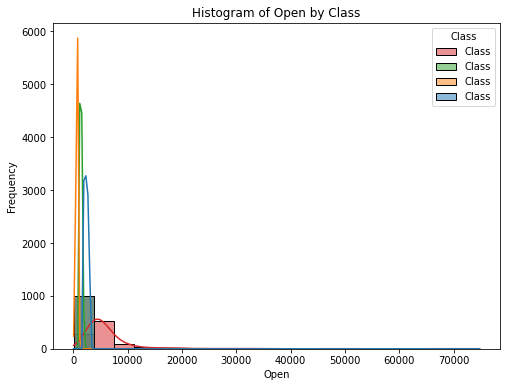

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='Open', hue='Class', kde=True, bins=20, label='Class')
plt.title('Histogram of Open by Class')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()




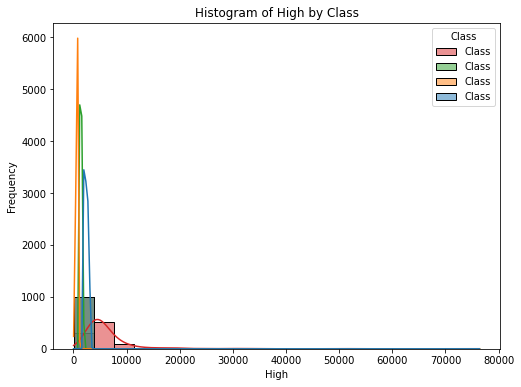

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='High', hue='Class', kde=True, bins=20, label='Class')
plt.title('Histogram of High by Class')
plt.xlabel('High')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


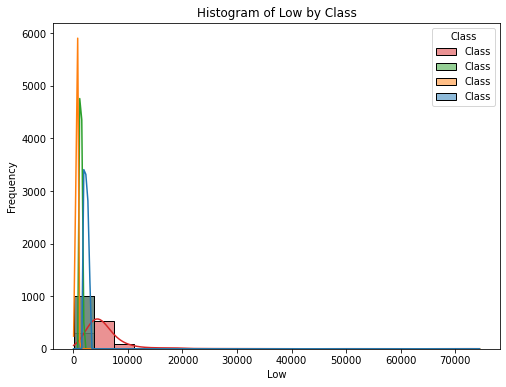

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='Low', hue='Class', kde=True, bins=20, label='Class')
plt.title('Histogram of Low by Class')
plt.xlabel('Low')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


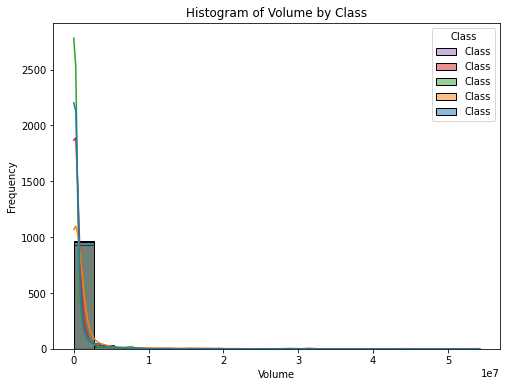

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='Volume', hue='Class', kde=True, bins=20, label='Class')
plt.title('Histogram of Volume by Class')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


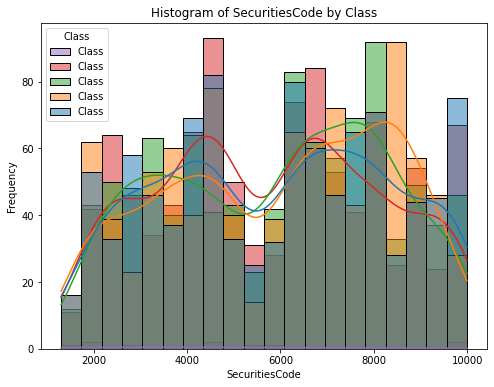

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='SecuritiesCode', hue='Class', kde=True, bins=20, label='Class')
plt.title('Histogram of SecuritiesCode by Class')
plt.xlabel('SecuritiesCode')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()

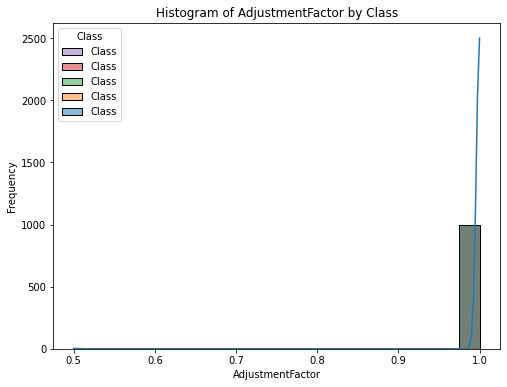

In [31]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='AdjustmentFactor', hue='Class', kde=True, bins=20, label='Class')
plt.title('Histogram of AdjustmentFactor by Class')
plt.xlabel('AdjustmentFactor')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


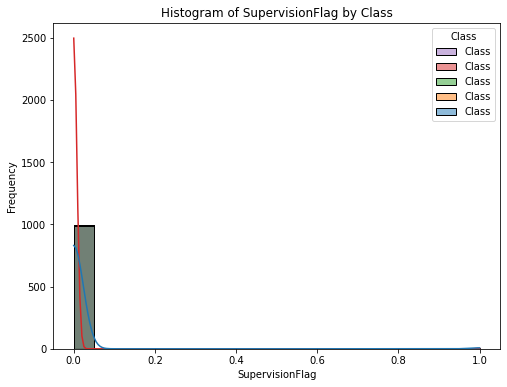

In [33]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='SupervisionFlag', hue='Class', kde=True, bins=20, label='Class')
plt.title('Histogram of SupervisionFlag by Class')
plt.xlabel('SupervisionFlag')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


### Make comments on what features look most promising for ML task.

 Open, High, Low, Close, and Volume are the most promising features for machine learning tasks related to stock price prediction. That is because these features directly capture the main characteristics of stock price movements, such as the opening, closing, highest, and lowest prices, as well as the trading volume. 

 SecuritiesCode  is primarily an identifier, and does not contribute to predictive modeling tasks

AdjustmentFactor and ExpectedDividend may not be as relevant for predictive modeling tasks, especially if there are a large number of missing values.

  Now, let's  look at the histograms of Open, High, Low, and Close

 The Open, High, and Low feature histograms show distinct distributions for each class, with rectangular boxes representing the distribution of values for each class. This shows that features have different behaviors across classes, which could provide important information for machine learning tasks. Volume shows less variability in volume across classes compared to these three, but because of the presence of distinct distributions, it still makes Volume another good feature for ML tasks. 

## Data Cleaning and Preparation for Machine Learning

### Perform any data cleaning. Be clear what are you doing, for what feature.
### Determinine if rescaling is important for your Machine Learning model.
### If so select strategy for each feature.
### Apply rescaling.
### Visualize the features before and after cleaning and rescaling.
### One-hot encode your categorical features.

In [99]:
import pandas as pd
stock_prices_df = pd.read_csv('stock_prices.csv')

## Initial Data Visualization


1. Size of the Dataset

In [100]:
# Size of the dataset
dataset_size = stock_prices_df.shape
print("Dataset Size:", dataset_size)


Dataset Size: (4000, 11)


In [101]:
print(stock_prices_df.columns)



Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'],
      dtype='object')


In [102]:
stock_prices_df.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend
count,4000.00000,3990.000000,3990.000000,3990.000000,3990.000000,4.000000e+03,4000.000000,0.0
mean,5883.05400,2769.756817,2811.185163,2734.021303,2783.387870,5.925823e+05,0.999875,NaN
std,2390.10627,4374.114452,4436.667423,4311.046277,4395.682456,2.103113e+06,0.007906,NaN
min,1301.00000,35.000000,36.000000,35.000000,35.000000,0.000000e+00,0.500000,NaN
25%,3915.75000,1039.250000,1057.000000,1027.000000,1044.250000,3.577500e+04,1.000000,NaN
50%,6200.50000,1852.000000,1891.500000,1839.000000,1879.500000,1.002000e+05,1.000000,NaN
75%,7938.25000,3113.750000,3159.250000,3085.000000,3130.000000,3.525750e+05,1.000000,NaN
max,9997.00000,74770.000000,76390.000000,74450.000000,76120.000000,5.421950e+07,1.000000,NaN


In [103]:
# Display basic information about the dataset
df_info = stock_prices_df.info()

# Display the first few rows of the dataset
df_head = stock_prices_df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowId             4000 non-null   object 
 1   Date              4000 non-null   object 
 2   SecuritiesCode    4000 non-null   int64  
 3   Open              3990 non-null   float64
 4   High              3990 non-null   float64
 5   Low               3990 non-null   float64
 6   Close             3990 non-null   float64
 7   Volume            4000 non-null   int64  
 8   AdjustmentFactor  4000 non-null   float64
 9   ExpectedDividend  0 non-null      float64
 10  SupervisionFlag   4000 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 316.5+ KB


(None,
            RowId        Date  SecuritiesCode    Open    High     Low   Close  \
 0  20211206_1301  2021-12-06            1301  2982.0  2982.0  2965.0  2971.0   
 1  20211206_1332  2021-12-06            1332   592.0   599.0   588.0   589.0   
 2  20211206_1333  2021-12-06            1333  2368.0  2388.0  2360.0  2377.0   
 3  20211206_1375  2021-12-06            1375  1230.0  1239.0  1224.0  1224.0   
 4  20211206_1376  2021-12-06            1376  1339.0  1372.0  1339.0  1351.0   
 
     Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  
 0     8900               1.0               NaN            False  
 1  1360800               1.0               NaN            False  
 2   125900               1.0               NaN            False  
 3    81100               1.0               NaN            False  
 4     6200               1.0               NaN            False  )

This dataset contains 4,000 entries and 11 columns, with a mix of object,integer, float, and boolean
data types. 

Here's a summary of the columns and some initial observations for data understanding part:

RowID: Object data type with 4,000 non-null values, contains unique indentifiers for each entry.

Date: Object data type with 4,000 non-null values, representing the date of observation for each entry.

SecuritiesCode: Integer data type with 4,000 non-null values, serves as identification codes for various securities.

Open: Float data type with 4,000 non-null values,  representing opening prices of stocks

High: Float data type with 4,000 non-null values, representing the highest price levels reached by the stocks.

Low: Float data type with 4,000 non-null values, representing the lowest price levels touched by the  stocks during the trading sessions or time periods. 

Close: Float data type with 4,000 non-null values, representing the closing prices of the stocks.

Volume: Integer data type with 4,000 non-null values, indicating the trading volume of the securities

AdjustmentFactor: Float data type with 4,000 non-null values, used for adjustment purposes

ExpectedDividend: with 0 non-null values,  indicating that their are no entries for expected dividends. It seems that there are no expected dividend values present in the dataset
    
SupervisionFlag: Boolean data type with 4,000 non-null values, indicates supervision status associated with each entry in dataset.

In [104]:
import pandas as pd

# To make my life easier so I don't have to type out a longer variable name
df = stock_prices_df


In [105]:
unique_row_ids = stock_prices_df['RowId'].nunique() == len(stock_prices_df['RowId'])
unique_row_ids


True

In [106]:

######### Understanding the distribution of categorical variables.

# Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for RowId:
20211206_1301    1
20211207_4527    1
20211207_4490    1
20211207_4493    1
20211207_4495    1
                ..
20211206_7269    1
20211206_7270    1
20211206_7272    1
20211206_7276    1
20211207_9997    1
Name: RowId, Length: 4000, dtype: int64

Value counts for Date:
2021-12-06    2000
2021-12-07    2000
Name: Date, dtype: int64



### Each value in the 'RowId' column is unique, as indicated by the value counts. Each value appears only once in the dataset, suggesting that each row has a unique indetifier.

## 2. Check Data Types

In [107]:
# Check data types of each column
data_types = df.dtypes
print(data_types)

RowId                object
Date                 object
SecuritiesCode        int64
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
AdjustmentFactor    float64
ExpectedDividend    float64
SupervisionFlag        bool
dtype: object


In [108]:

# Check data types

# Check data types
data_types = df.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in df.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {df[column].nunique()}")
    print(f" - Sample Values: {df[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: RowId
 - Data Type: object
 - Number of Unique Values: 4000
 - Sample Values: ['20211206_1301' '20211206_1332' '20211206_1333' '20211206_1375'
 '20211206_1376']

Column: Date
 - Data Type: object
 - Number of Unique Values: 2
 - Sample Values: ['2021-12-06' '2021-12-07']

Column: SecuritiesCode
 - Data Type: int64
 - Number of Unique Values: 2000
 - Sample Values: [1301 1332 1333 1375 1376]

Column: Open
 - Data Type: float64
 - Number of Unique Values: 2418
 - Sample Values: [2982.  592. 2368. 1230. 1339.]

Column: High
 - Data Type: float64
 - Number of Unique Values: 2441
 - Sample Values: [2982.  599. 2388. 1239. 1372.]

Column: Low
 - Data Type: float64
 - Number of Unique Values: 2458
 - Sample Values: [2965.  588. 2360. 1224. 1339.]

Column: Close
 - Data Type: float64
 - Number of Unique Values: 2459
 - Sample Values: [2971.  589. 2377. 1224. 1351.]

Column: Volume
 - Data Type: int64
 - Number of Unique Values: 2560
 - Sample Valu

The Date column needs to be converted to datetime format for easier manipulation and analysis. 

In [109]:
import pandas as pd

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])



In [110]:
# Check the data types of each column
data_types = df.dtypes
print(data_types)


RowId                       object
Date                datetime64[ns]
SecuritiesCode               int64
Open                       float64
High                       float64
Low                        float64
Close                      float64
Volume                       int64
AdjustmentFactor           float64
ExpectedDividend           float64
SupervisionFlag               bool
dtype: object


3. Check for Invalid Entries

In [111]:
invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:\n", invalid_entries)


Invalid Entries:
 RowId               0
Date                0
SecuritiesCode      0
Open                0
High                0
Low                 0
Close               0
Volume              0
AdjustmentFactor    0
ExpectedDividend    0
SupervisionFlag     0
dtype: int64


### There are no invalid entries.

In [112]:

# Check for duplicate records
duplicates = df.duplicated().sum()
print("Number of Duplicate Records:", duplicates)

Number of Duplicate Records: 0


In [113]:
# Check Date Format
date_format_inconsistencies = df['Date'].apply(lambda x: x if isinstance(x, str) and len(x) == 10 and x[4] == '-' and x[7] == '-' else None)
date_format_inconsistencies = date_format_inconsistencies.dropna()
print("Date Format Inconsistencies:\n", date_format_inconsistencies)


Date Format Inconsistencies:
 Series([], Name: Date, dtype: object)


In [114]:
# Check for format inconsistencies in RowId
row_id_format_inconsistencies = df[~df['RowId'].str.match(r'\d{8}_\d{4}$')]
print("Format Inconsistencies in RowId:")
print(row_id_format_inconsistencies)

# Check for format inconsistencies in SecuritiesCode
securities_code_format_inconsistencies = df[~df['SecuritiesCode'].astype(str).str.isdigit()]
print("\nFormat Inconsistencies in SecuritiesCode:")
print(securities_code_format_inconsistencies)

# Check for unexpected values in Open, High, Low, Close
price_columns = ['Open', 'High', 'Low', 'Close']
price_format_inconsistencies = df[~df[price_columns].applymap(lambda x: isinstance(x, (int, float)))].dropna()
print("\nFormat Inconsistencies in Price Columns:")
print(price_format_inconsistencies)

# Check for format inconsistencies in Volume
volume_format_inconsistencies = df[~df['Volume'].astype(str).str.isdigit()]
print("\nFormat Inconsistencies in Volume:")
print(volume_format_inconsistencies)

# Check for unexpected values in AdjustmentFactor
adjustment_factor_format_inconsistencies = df[~df['AdjustmentFactor'].apply(lambda x: isinstance(x, (int, float)))]
print("\nFormat Inconsistencies in AdjustmentFactor:")
print(adjustment_factor_format_inconsistencies)

# Check for unexpected values in ExpectedDividend (should be all NaN)
expected_dividend_inconsistencies = df[~df['ExpectedDividend'].isnull()]
print("\nFormat Inconsistencies in ExpectedDividend:")
print(expected_dividend_inconsistencies)


Format Inconsistencies in RowId:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag]
Index: []

Format Inconsistencies in SecuritiesCode:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag]
Index: []

Format Inconsistencies in Price Columns:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag]
Index: []

Format Inconsistencies in Volume:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag]
Index: []

Format Inconsistencies in AdjustmentFactor:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag]
Index: []

Format Inconsistencies in ExpectedDividend:
Empty D

No format inconsistencies

### 6. Initial Data Visualization

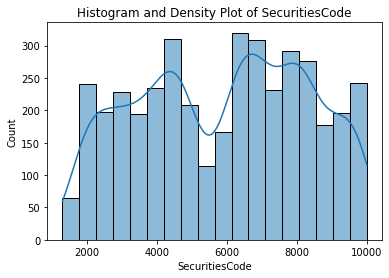

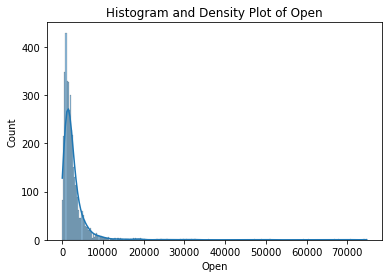

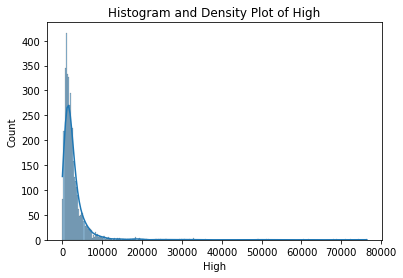

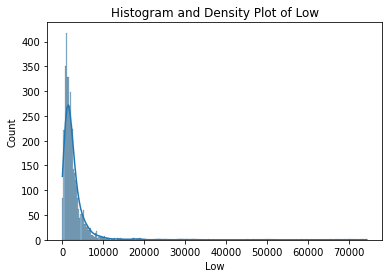

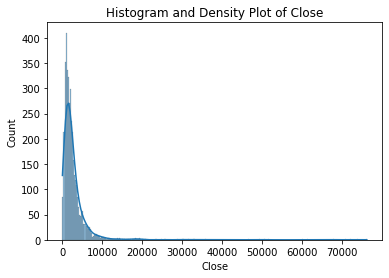

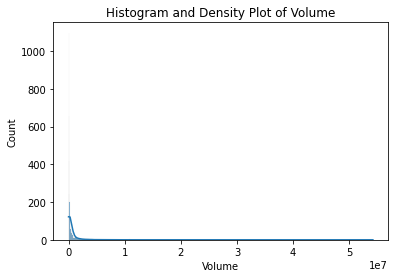

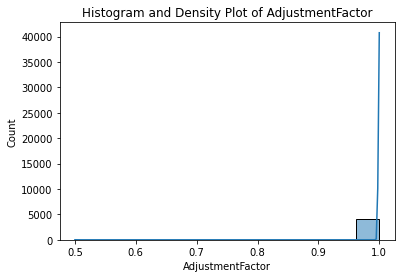

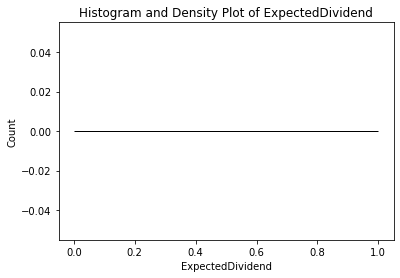

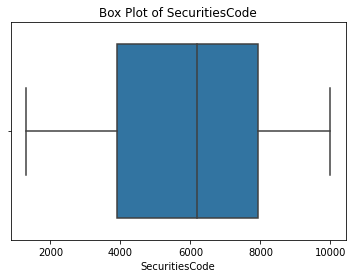

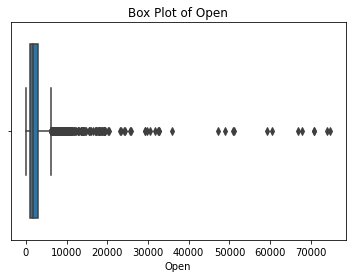

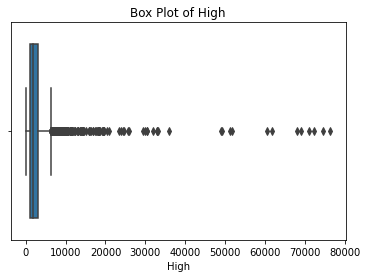

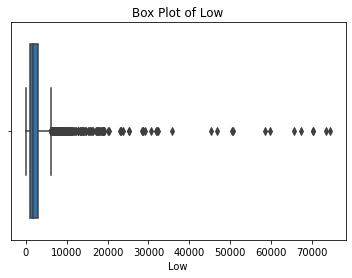

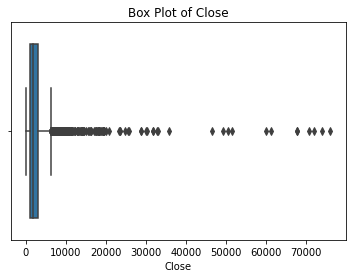

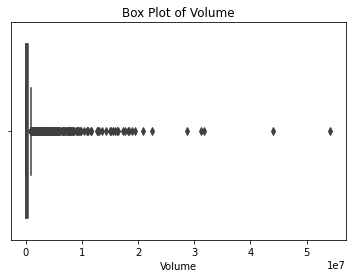

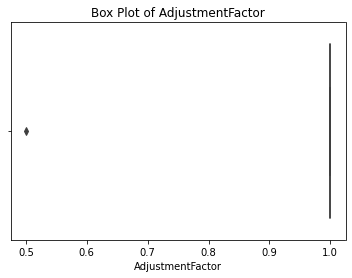

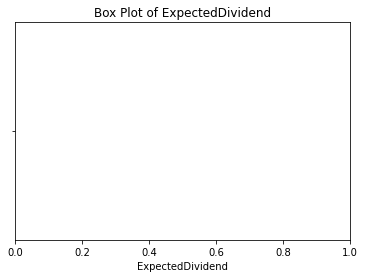

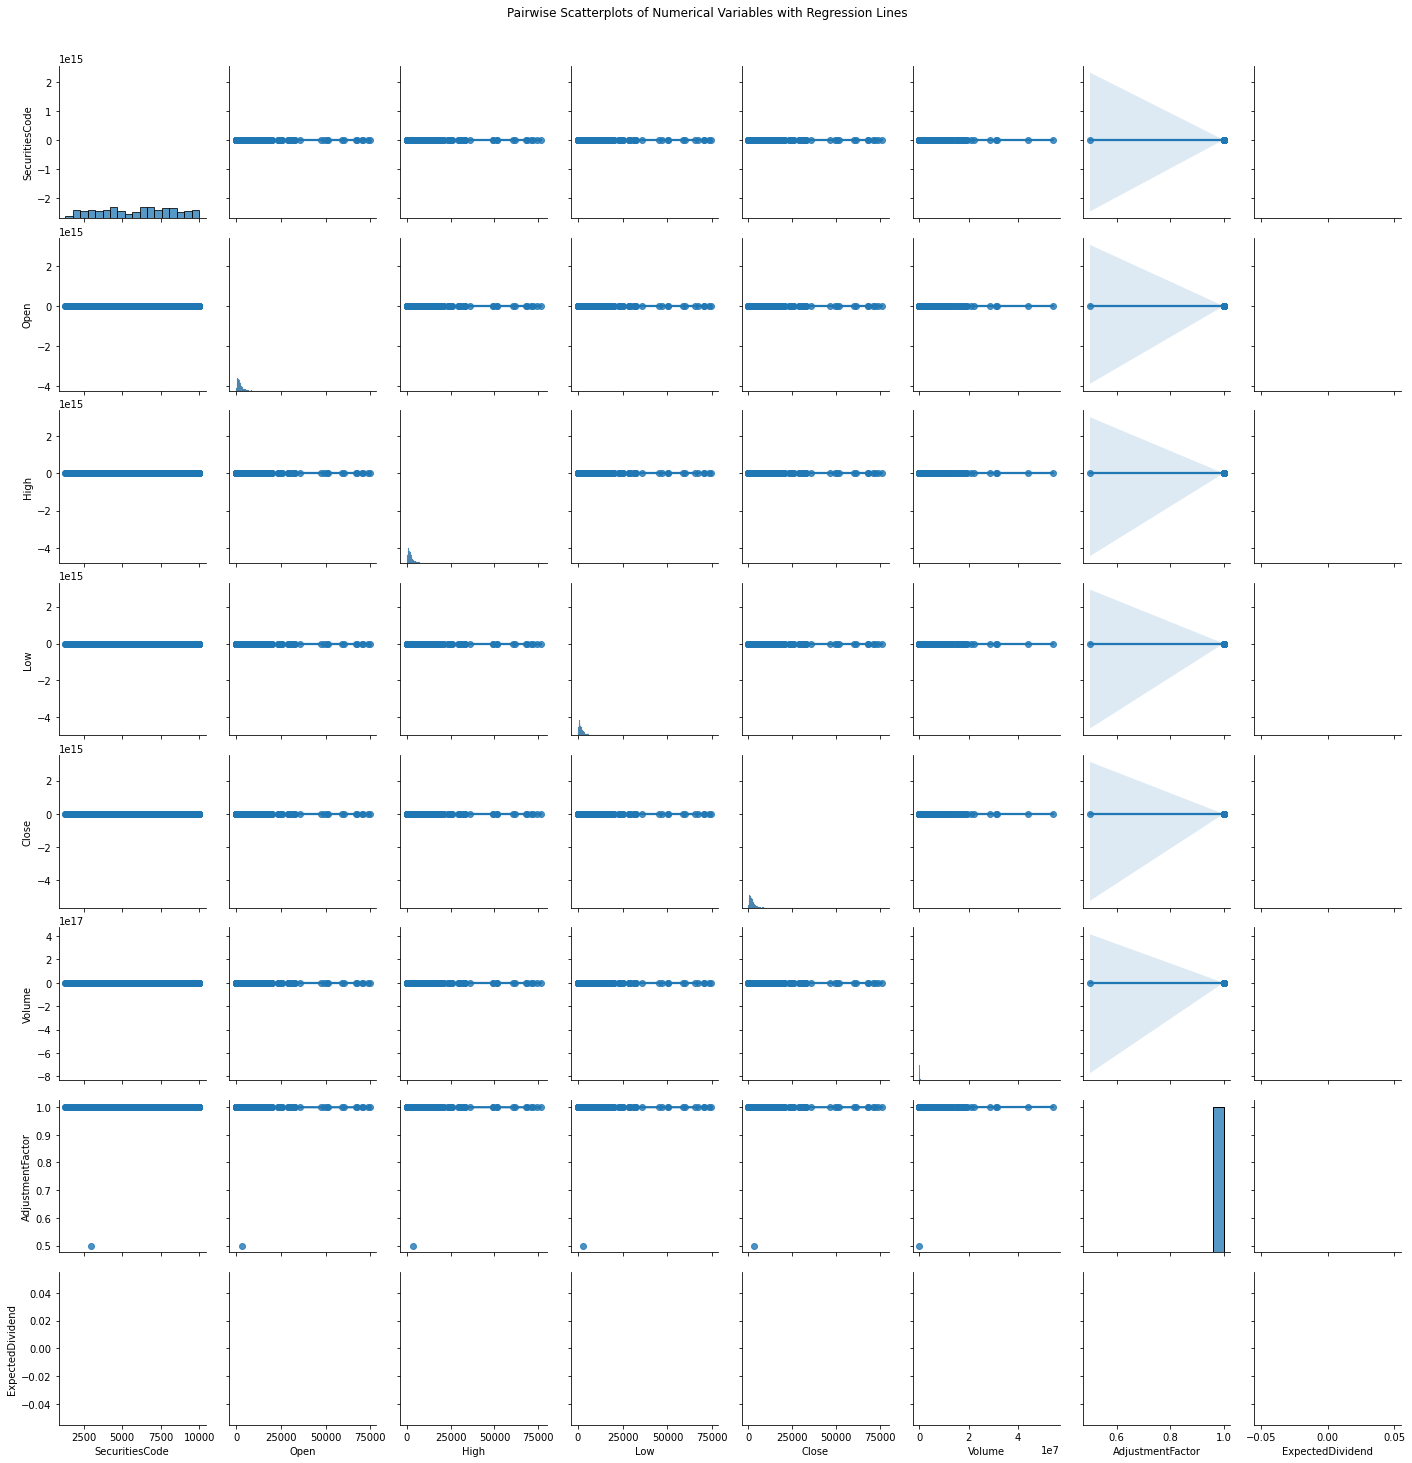

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and density plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.show()

# Box plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Scatterplots for relationships between numerical variables
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle('Pairwise Scatterplots of Numerical Variables with Regression Lines', y=1.02)
plt.show()

In [ ]:
Comments:

    Securities Code:

Observation: The histogram shows varying blue boxes, indicating different frequencies of securities codes.
Comment: The distribution of securities codes appears to be spread across different values, suggesting a diverse range of securities in the dataset.
Open, High, Low, Close:

Observation: The histograms for open, high, low, and close prices display a curve with higher values on the left, gradually decreasing as it moves towards the right.
Comment: This shape suggests that the majority of the prices are concentrated towards the lower end, with fewer instances of higher prices. It could indicate potential skewness in the distribution of price values.
Volume:

Observation: The histogram for volume shows a small curve with few points.
Comment: The distribution of volume appears to be concentrated at lower values, with only a few instances of higher volume. This suggests that most trading activity involves lower volumes.
Adjustment Factor:

Observation: The histogram for the adjustment factor shows a small, short box with a single line cutting vertically across it.
Comment: The majority of adjustment factor values are concentrated around 1, with a few outliers extending up to around 5,000. The vertical line indicates the presence of a significant outlier or a few extreme values.
Expected Dividend:

Observation: The histogram for expected dividend shows a single horizontal line.
Comment: The distribution of expected dividend values appears to be highly skewed, with the vast majority of values concentrated at a single level. This suggests that expected dividend values are mostly constant or have very little variation.

### Correlation Matrix

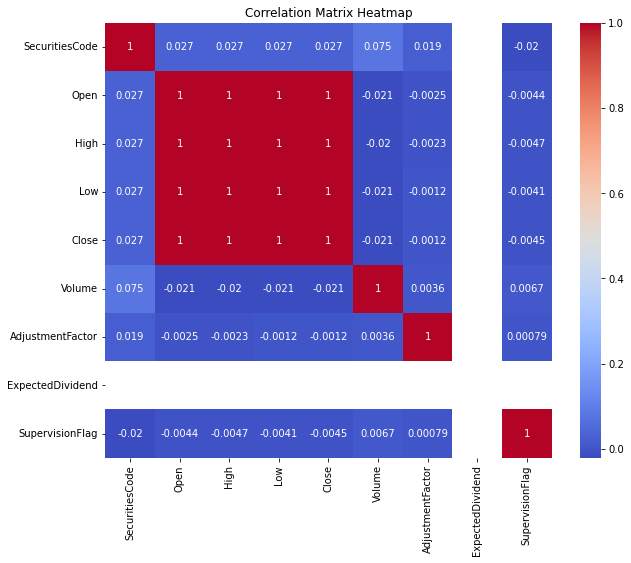

In [116]:
# Correlation matrix. Understanding how different numerical variables relate to each other can be insightful.
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Comments:  The red square in the correlation matrix heatmap starts at the "Open" column and ends at the "Close" column, with each small square having a correlation coefficient of 1, suggesting a perfect positive correlation between these variables. A perfect stock correlation between the opening and closing prices indicates that the closing price of a stock is always directly proportional to its opening price for each observation in the dataset. This means that when the opening price is high, the closing price is also high, and vice versa.

7. Missing Data

In [117]:

# Missing Data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 RowId                  0
Date                   0
SecuritiesCode         0
Open                  10
High                  10
Low                   10
Close                 10
Volume                 0
AdjustmentFactor       0
ExpectedDividend    4000
SupervisionFlag        0
dtype: int64


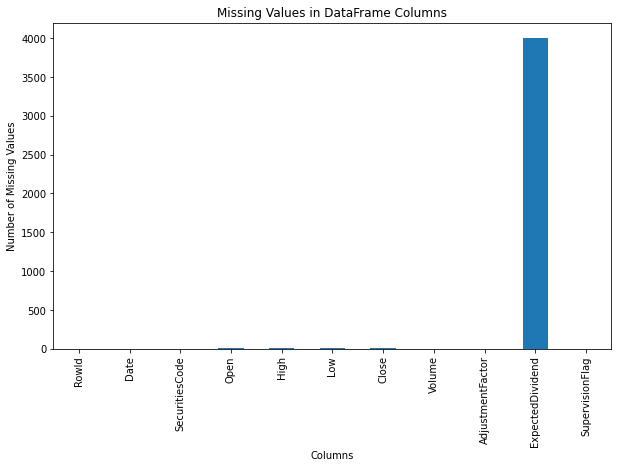

In [120]:
import matplotlib.pyplot as plt
import pandas as pd


# Count missing values in each column
missing_values_count = df.isnull().sum()

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar')
plt.title('Missing Values in DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


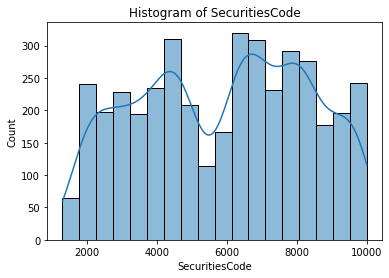

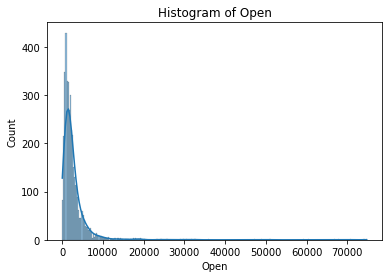

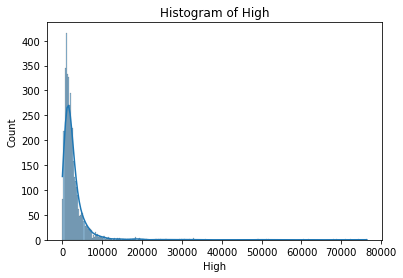

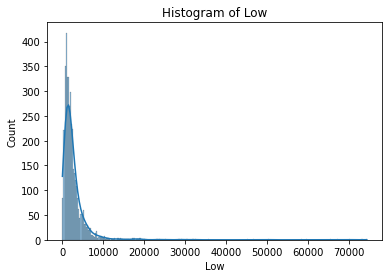

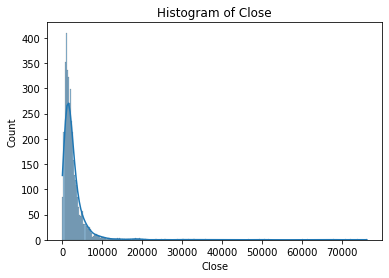

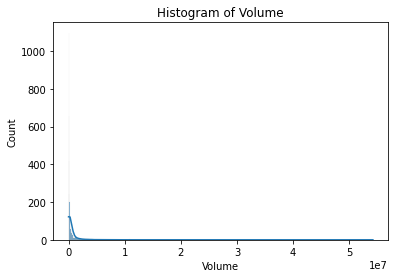

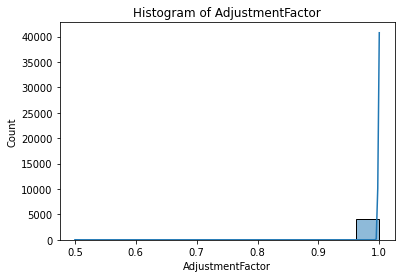

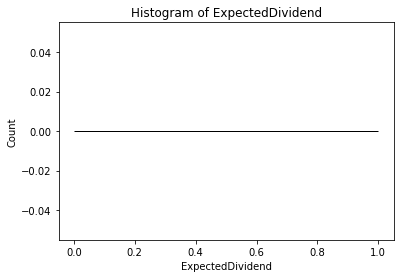

In [121]:
########### Assess Distribution and Missingness


import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numeric columns
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

Comments:

The Open/High/Low/Close histograms display right-skewed distributions with positive skewness, indicating that the majority of values are concentrated towards the lower end of the scale. Since the data is skewed, median imputation would be more appropriate than mean imputation.

The ExpectedDividend histogram indicates that there are no distinct values present, which suggests that missingness is due to the  absence of dividends. Because it has no values, we can drop this column. 

In [122]:
df.drop(columns=['ExpectedDividend'], inplace=True)


In [124]:
# Calculate median for each column
median_open = df['Open'].median()
median_high = df['High'].median()
median_low = df['Low'].median()
median_close = df['Close'].median()


# Fill missing values with median
df['Open'].fillna(median_open, inplace=True)
df['High'].fillna(median_high, inplace=True)
df['Low'].fillna(median_low, inplace=True)
df['Close'].fillna(median_close, inplace=True)



In [125]:
# Recheck missingness
print("Missing Data After Imputation:\n", df.isnull().sum())

Missing Data After Imputation:
 RowId               0
Date                0
SecuritiesCode      0
Open                0
High                0
Low                 0
Close               0
Volume              0
AdjustmentFactor    0
SupervisionFlag     0
dtype: int64


### 8. Check for Outliers

Comment: All of the columns are marked as 'False', indicating that no outliers were detected for any of the numerical columns.

In [131]:
# Define a function to detect outliers based on the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection
outliers_open = detect_outliers(df['Open']).sum()
outliers_high = detect_outliers(df['High']).sum()
outliers_low = detect_outliers(df['Low']).sum()
outliers_close = detect_outliers(df['Close']).sum()
outliers_volume = detect_outliers(df['Volume']).sum()
outliers_adjustment_factor = detect_outliers(df['AdjustmentFactor']).sum()


outliers_summary = {
    'Open Outliers': outliers_open,
    'High Outliers': outliers_high,
    'Low Outliers': outliers_low,
    'Close Outliers': outliers_close,
    'Volume Outliers': outliers_volume,
    'AdjustmentFactor Outliers': outliers_adjustment_factor
   
}

outliers_summary


{'Open Outliers': 271,
 'High Outliers': 275,
 'Low Outliers': 270,
 'Close Outliers': 273,
 'Volume Outliers': 539,
 'AdjustmentFactor Outliers': 1}

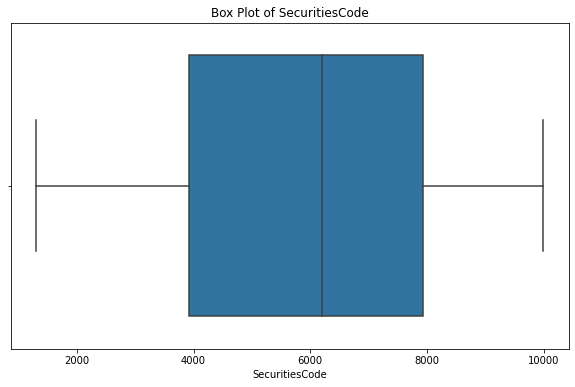

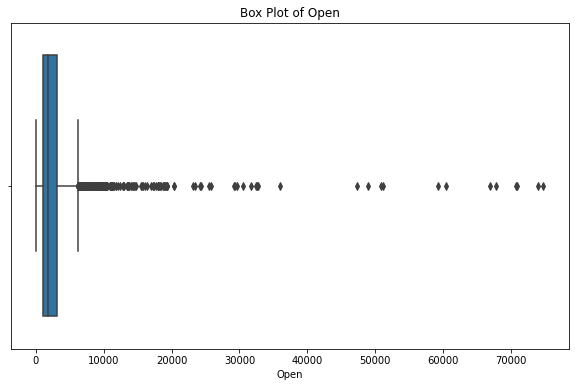

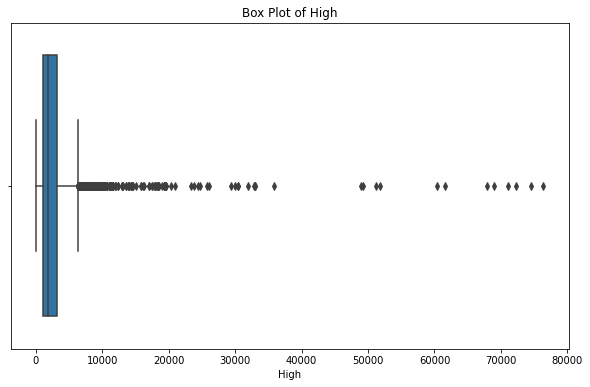

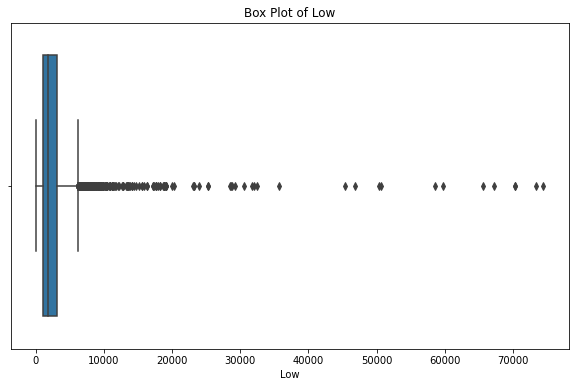

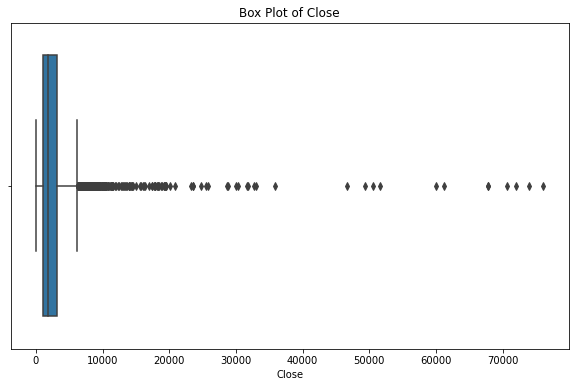

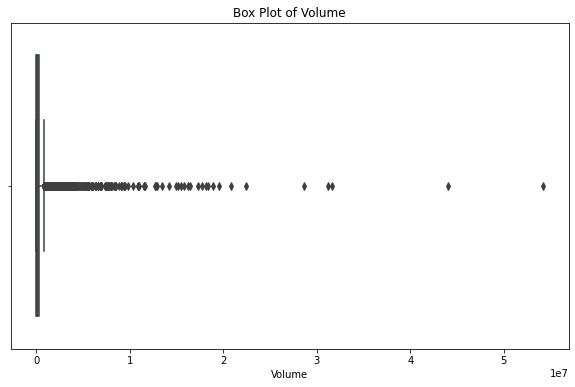

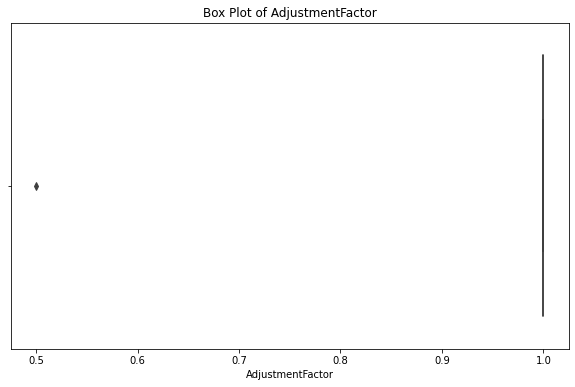

In [132]:
# Creating box plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

The outlier analysis reveals:

Open Outliers: 271 entries are identified as outliers, indicating that there this many points falling significantly outside the range.
High Outliers: 275 entries are identified as outliers  indicating that there this many points falling significantly outside the range. 
Low Outliers:  270 entries are identified as outliers  indicating that there this many points falling significantly outside the range.
Close Outliers: 273 entries are identified as outliers  indicating that there this many points falling significantly outside the range.
Volume Outliers: 539 entries are identified as outliers  indicating that there this many points falling significantly outside the range.
AdjustmentFactor Outliers: 1 entries are identified as outliers, indicating that there this many points falling significantly outside the range.

Open, High, Low, Close: These columns represent stock price data. Outliers in these columns could indicate extreme price movements, which may be genuine and important for financial analysis. I'm going to leave them as is.

Volume: Outliers in the volume column could indicate unusually high trading volumes, which may be associated with significant market events or data anomalies. I need to evaluate the impact of these outliers on my analysis and consider whether they should be removed or capped to prevent them from unduly influencing my results.

AdjustmentFactor: Since there is only one outlier in this column, I may want to investigate the reason for this outlier. If it is an error or anomaly,  I may consider removing or correcting it. Otherwise, I can leave it as is.

In [135]:
import pandas as pd



# Summary statistics for the 'Volume' column
volume_stats = df['Volume'].describe()

# Summary statistics for the 'AdjustmentFactor' column
adjustment_factor_stats = df['AdjustmentFactor'].describe()

# Display summary statistics
print("Summary Statistics for Volume Column:")
print(volume_stats)
print("\nSummary Statistics for AdjustmentFactor Column:")
print(adjustment_factor_stats)

# Skewness and kurtosis for both columns
volume_skewness = df['Volume'].skew()
volume_kurtosis = df['Volume'].kurtosis()

adjustment_factor_skewness = df['AdjustmentFactor'].skew()
adjustment_factor_kurtosis = df['AdjustmentFactor'].kurtosis()

print("\nSkewness for Volume Column:", volume_skewness)
print("Kurtosis for Volume Column:", volume_kurtosis)

print("\nSkewness for AdjustmentFactor Column:", adjustment_factor_skewness)
print("Kurtosis for AdjustmentFactor Column:", adjustment_factor_kurtosis)


Summary Statistics for Volume Column:
count    4.000000e+03
mean     5.925823e+05
std      2.103113e+06
min      0.000000e+00
25%      3.577500e+04
50%      1.002000e+05
75%      3.525750e+05
max      5.421950e+07
Name: Volume, dtype: float64

Summary Statistics for AdjustmentFactor Column:
count    4000.000000
mean        0.999875
std         0.007906
min         0.500000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: AdjustmentFactor, dtype: float64

Skewness for Volume Column: 11.522950961083064
Kurtosis for Volume Column: 200.65785556270828

Skewness for AdjustmentFactor Column: -63.24555320336763
Kurtosis for AdjustmentFactor Column: 4000.000000000001


# Volume Column:

The data ranges from 0 to 54,219,500 with a mean of approximately 592,582 and a standard deviation of around 2,103,113.
The distribution appears to be highly skewed to the right (positive skewness), as indicated by the skewness value of 11.52.
The kurtosis value of 200.66 suggests a high degree of peakedness and heavy tails in the distribution, indicative of outliers or extreme values.
AdjustmentFactor Column:

The adjustment factor values range from 0.5 to 1.0, with most values centered around 1.0.
The skewness value of -63.25 suggests a highly skewed distribution, but since it's a categorical variable (with values clustered around 1.0), this skewness value may not be meaningful.
The kurtosis value of 4000 indicates extremely heavy tails in the distribution, which might suggest the presence of outliers or extreme values, but again, this may not be relevant for a categorical variable like adjustment factor.


Based on the provided statistics and observations, it seems reasonable to consider removing outliers from the Volume column due to its high skewness and kurtosis values, indicating potential extreme values. However, for the AdjustmentFactor column, which appears to be a categorical variable, removing outliers may not be applicable, as its distribution is centered around categorical values (e.g., 1.0), and the skewness and kurtosis values may not accurately represent its distribution.

In [136]:
# Removing outliers from volume column

#Step 1: Calculate IQR
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter DataFrame to exclude outliers
df_filtered = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]




In [137]:
# Summary statistics before outlier removal
print("Summary Statistics for Volume Column (Before):")
print(df['Volume'].describe())

# Summary statistics after outlier removal
print("\nSummary Statistics for Volume Column (After):")
print(df_filtered['Volume'].describe())

Summary Statistics for Volume Column (Before):
count    4.000000e+03
mean     5.925823e+05
std      2.103113e+06
min      0.000000e+00
25%      3.577500e+04
50%      1.002000e+05
75%      3.525750e+05
max      5.421950e+07
Name: Volume, dtype: float64

Summary Statistics for Volume Column (After):
count      3461.000000
mean     150929.326784
std      180952.743371
min           0.000000
25%       30300.000000
50%       78300.000000
75%      195200.000000
max      827000.000000
Name: Volume, dtype: float64


The summary statistics after removing outliers show a reduction in the mean and standard deviation, indicating a decrease in the spread of the data. The quartile values (25th, 50th, and 75th percentiles) also show different distributions compared to before the removal of outliers. By removing the outliers, the data now falls within a more expected range, which reduces the impact of extreme values on the overall distribution.

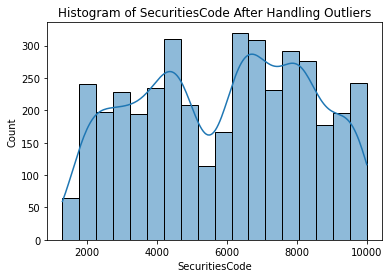

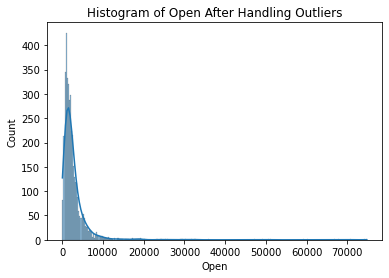

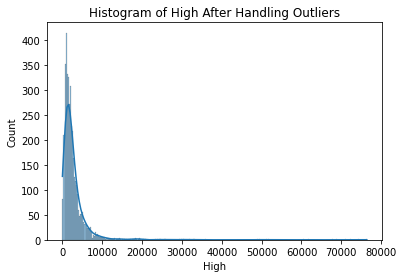

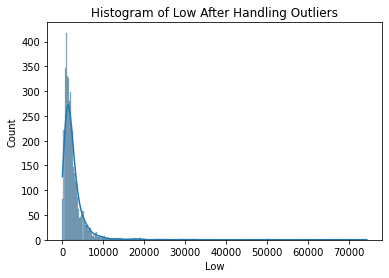

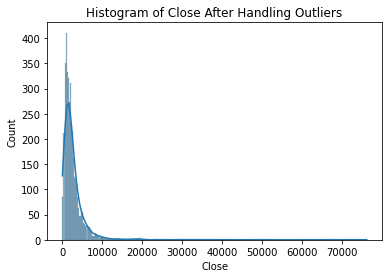

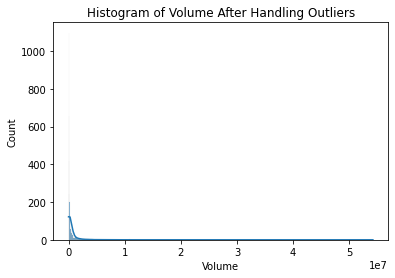

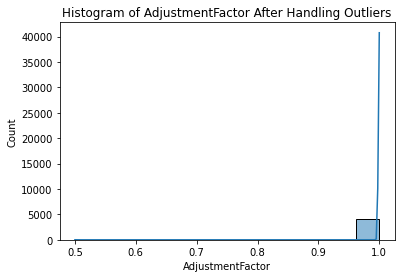

In [138]:
# Histograms after handling outliers
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col} After Handling Outliers')
    plt.show()

### 9. Transforming numerical data and encoding categorical variables

Lets do a log transformation as it is useful for highly skewed data.

In [142]:
import numpy as np

# Log transformation for Volume column
df['Volume_Log'] = np.log(df['Volume'])

# Display the first few rows to show all columns including the log-transformed Volume
print(df.head())




           RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  20211206_1301 2021-12-06            1301  2982.0  2982.0  2965.0  2971.0   
1  20211206_1332 2021-12-06            1332   592.0   599.0   588.0   589.0   
2  20211206_1333 2021-12-06            1333  2368.0  2388.0  2360.0  2377.0   
3  20211206_1375 2021-12-06            1375  1230.0  1239.0  1224.0  1224.0   
4  20211206_1376 2021-12-06            1376  1339.0  1372.0  1339.0  1351.0   

     Volume  AdjustmentFactor  SupervisionFlag  Volume_Log  
0  2.207594               1.0            False    0.791903  
1  2.647846               1.0            False    0.973746  
2  2.463278               1.0            False    0.901493  
3  2.425107               1.0            False    0.885876  
4  2.167029               1.0            False    0.773357  


### Normalization

In [143]:
# Min-Max Scaling (Normalization)
def min_max_scaling(feature):
    min_val = feature.min()
    max_val = feature.max()
    return (feature - min_val) / (max_val - min_val)

# Z-score Normalization (Standardization)
def z_score_normalization(feature):
    mean = feature.mean()
    std_dev = feature.std()
    return (feature - mean) / std_dev

# Apply Min-Max Scaling and Z-score Normalization to the dataset
normalized_df = pd.DataFrame()
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        normalized_df[col + '_minmax'] = min_max_scaling(df[col])
        normalized_df[col + '_zscore'] = z_score_normalization(df[col])

# Display the normalized dataset
print(normalized_df.head())


   SecuritiesCode_minmax  SecuritiesCode_zscore  Open_minmax  Open_zscore  \
0               0.000000              -1.917092     0.039433     0.049106   
1               0.003565              -1.904122     0.007453    -0.497945   
2               0.003680              -1.903704     0.031217    -0.091434   
3               0.008510              -1.886131     0.015990    -0.351912   
4               0.008625              -1.885713     0.017448    -0.326963   

   High_minmax  High_zscore  Low_minmax  Low_zscore  Close_minmax  \
0     0.038583     0.039066    0.039374    0.054162      0.038588   
1     0.007374    -0.498693    0.007431   -0.497873      0.007281   
2     0.030804    -0.094979    0.031244   -0.086343      0.030781   
3     0.015756    -0.354268    0.015978   -0.350168      0.015627   
4     0.017497    -0.324254    0.017523   -0.323461      0.017296   

   Close_zscore  Volume_minmax  Volume_zscore  AdjustmentFactor_minmax  \
0      0.043247       0.503079      -1.400056   

### Encoding Categorical Variables
###  One-Hot Encoding Categorical Features

In [144]:
# One-hot encode categorical features
encoded_df = pd.get_dummies(df, columns=['SupervisionFlag'])

# Display the encoded DataFrame
print(encoded_df.head())


           RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  20211206_1301 2021-12-06            1301  2982.0  2982.0  2965.0  2971.0   
1  20211206_1332 2021-12-06            1332   592.0   599.0   588.0   589.0   
2  20211206_1333 2021-12-06            1333  2368.0  2388.0  2360.0  2377.0   
3  20211206_1375 2021-12-06            1375  1230.0  1239.0  1224.0  1224.0   
4  20211206_1376 2021-12-06            1376  1339.0  1372.0  1339.0  1351.0   

     Volume  AdjustmentFactor  Volume_Log  SupervisionFlag_False  \
0  2.207594               1.0    0.791903                      1   
1  2.647846               1.0    0.973746                      1   
2  2.463278               1.0    0.901493                      1   
3  2.425107               1.0    0.885876                      1   
4  2.167029               1.0    0.773357                      1   

   SupervisionFlag_True  
0                     0  
1                     0  
2                     0  
3           


# Machine Learning
## Problem Formulation
### Remove unneed columns, for example:
    duplicated
    categorical features that were turned into one-hot.
    features that identify specific rows, like ID number.
    make sure your target is properly encoded also.
    Split training sample into train, validation, and test sub-samples.

In [ ]:
# Drop the specified columns
df = df.drop(columns=['RowId', 'SupervisionFlag'])

In [155]:
print(df.columns)


Index(['Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close', 'Volume',
       'AdjustmentFactor', 'Volume_Log'],
      dtype='object')


# Train ML Algorithm


In [180]:
import numpy as np

# Define the Node class for the Decision Tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Feature index for splitting
        self.threshold = threshold  # Threshold for splitting
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value for leaf nodes

# Define the Decision Tree class
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y.astype(int))


    def predict(self, X):
        return np.array([self._predict_row(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < self.min_samples_split:
            value = np.bincount(y).argmax()
            return Node(value=value)

        # Find the best split
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        # Split the dataset
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _predict_row(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_row(x, node.left)
        else:
            return self._predict_row(x, node.right)

    def _gini_impurity(self, left_y, right_y):
        n = len(left_y) + len(right_y)
        p_left = len(left_y) / n
        p_right = len(right_y) / n
        return p_left * self._calc_gini(left_y) + p_right * self._calc_gini(right_y)

    def _calc_gini(self, y):
        if len(y) == 0:
            return 0
        p = np.bincount(np.round(y).astype(int)) / len(y)
        return 1 - np.sum(p ** 2)


# Define the size of the test set (e.g., 20% of the total data)
test_size = 0.2

# Split the data into training and test sets
train_data = df.sample(frac=1-test_size, random_state=42)  # Use 80% of the data for training
test_data = df.drop(train_data.index)  # Use the remaining 20% for testing

# Example usage:
# Instantiate and train the model
tree = DecisionTree(max_depth=3)
X_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values
tree.fit(X_train, y_train)

# Make predictions
X_test = test_data.drop(columns=['Close']).values
predictions = tree.predict(X_test)
print(predictions)


[ 653 1407 1999 3140 3140 1407 1999 3140  836 1032 3140 3140  653 1407
 3140 1407 1999  653 1407  653 3140 3140 1407 3140 3140 3140 3140 3140
 3140  653 1407  836 1407 3140 1407 3140 1407 3140 3140  653 1999 3140
 3140 1879 3140 1032 3140 1407 1032 3140 1999 1407 3140  836 3140 3140
 3140 1407  653 3140 1407 1407 3140  836 1407  653 3140 1407 3140  836
 3140 1999  836 1407 3140 3140 3140 3140  653  653 3140  653 1999 1407
  653 1407 1999 3140 3140 1032 3140 1407 3140 3140 1407 3140 3140 3140
  653  653 1407  653  653  653 3140 3140 3140 3140 3140 1062 1407 3140
 1407 3140 3140 3140 3140 1999 1407 1407 3140 1999  836 3140  836  653
 3140 1407  653 3140  653 1407 3140 3140 1407  653  653 1407 1407 3140
 3140  653 3140 1407 1407 3140 3140 3140 1407 1407 1407 3140 1407 3140
 3140  653  653 3140 3140 3140 3140 1407 1407 1407 3140 3140 3140 1999
  836 3140  653 3140 1407 1407 3140 1407 1407 1407 1407 3140 1407 1407
 1407 3140 3140 1407  836 1407 3140 3140 3140 3140 3140  653  836  836
  836 

In [189]:
import pandas as pd
import numpy as np

# Define the Node class for the Decision Tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Feature index for splitting
        self.threshold = threshold  # Threshold for splitting
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value for leaf nodes

# Define the Decision Tree class
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y.astype(int))

    def predict(self, X):
        return np.array([self._predict_row(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < self.min_samples_split:
            value = np.bincount(y).argmax()
            return Node(value=value)

        # Find the best split
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        # Split the dataset
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _predict_row(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_row(x, node.left)
        else:
            return self._predict_row(x, node.right)

    def _gini_impurity(self, left_y, right_y):
        n = len(left_y) + len(right_y)
        p_left = len(left_y) / n
        p_right = len(right_y) / n
        return p_left * self._calc_gini(left_y) + p_right * self._calc_gini(right_y)

    def _calc_gini(self, y):
        if len(y) == 0:
            return 0
        p = np.bincount(np.round(y).astype(int)) / len(y)
        return 1 - np.sum(p ** 2)


import pandas as pd
import numpy as np

# Assuming 'df' contains your DataFrame with the 'Close' column
# Instantiate and train the model
tree = DecisionTree(max_depth=3)
X_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values
tree.fit(X_train, y_train)

# Make predictions
X_test = test_data.drop(columns=['Close']).values
predictions = tree.predict(X_test)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame()

# Assign 'Date' column from 'test_data' to the predictions DataFrame
predictions_df['Date'] = test_data['Date']

# Reset index to start from 0
predictions_df.reset_index(drop=True, inplace=True)

# Assign the predicted values to the 'Close' column
predictions_df['Close'] = predictions

# Add a placeholder for the 'Rank' column (you'll compute it later)
predictions_df['Rank'] = np.arange(len(predictions_df))

# Now predictions_df should have the required structure
print(predictions_df.head())


        Date  Close  Rank
0 2021-12-06    653     0
1 2021-12-06   1407     1
2 2021-12-06   1999     2
3 2021-12-06   3140     3
4 2021-12-06   3140     4


In [190]:
print(predictions_df)


          Date  Close  Rank
0   2021-12-06    653     0
1   2021-12-06   1407     1
2   2021-12-06   1999     2
3   2021-12-06   3140     3
4   2021-12-06   3140     4
..         ...    ...   ...
795 2021-12-07   3140   795
796 2021-12-07   3140   796
797 2021-12-07   3140   797
798 2021-12-07   3140   798
799 2021-12-07   3140   799

[800 rows x 3 columns]


Mean Absolute Error: 954.33
Mean Squared Error: 9771089.178399999
Root Mean Squared Error: 3125.874146282924


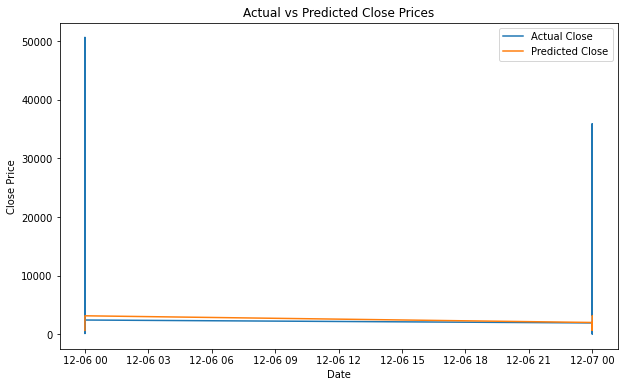

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(test_data['Close'] - predictions))

# Calculate Mean Squared Error (MSE)
mse = np.mean((test_data['Close'] - predictions) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close')
plt.plot(test_data['Date'], predictions, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()


In [208]:
import pandas as pd

# Assuming your data is stored in a list or NumPy array
close_values = [653, 1407, 1999, 3140, 3140, 1407, 1999, 3140, 836, 1032, 3140, 3140, 653, 1407, 3140, 1407, 1999, 653, 1407, 653, 3140, 3140, 1407, 3140, 3140, 3140, 3140, 3140, 3140, 653, 1407, 836, 1407, 3140, 1407, 3140, 1407, 3140, 3140, 653, 1999, 3140, 3140, 1879, 3140, 1032, 3140, 1407, 1032, 3140, 1999, 1407, 3140, 836, 3140, 3140, 3140, 1407, 653, 3140, 1407, 1407, 3140, 836, 1407, 653, 3140, 1407, 3140, 836, 3140, 1999, 836, 1407, 3140, 3140, 3140]

# Creating a DataFrame
predictions_df = pd.DataFrame({'Close': close_values})

# Displaying the DataFrame
print(predictions_df.head())


   Close
0    653
1   1407
2   1999
3   3140
4   3140


In [243]:
import pandas as pd

# Define the function to calculate Sharpe Ratio
def calc_sharpe_ratio(predictions_df):
    def _calc_spread_return_per_day(df):
        # Calculate the spread return for each day
        purchase = df.sort_values(by='Close')['Close'][:portfolio_size].mean()
        short = df.sort_values(by='Close', ascending=False)['Close'][:portfolio_size].mean()
        return purchase - short

    # Calculate spread return per day
    spread_return_df = predictions_df.groupby(predictions_df.index).apply(_calc_spread_return_per_day)

    # Calculate Sharpe ratio
    sharpe_ratio = spread_return_df.mean() / spread_return_df.std()
    return sharpe_ratio

# Assuming 'predictions_df' is the DataFrame containing your predictions
sharpe_ratio = calc_sharpe_ratio(predictions_df)

# Print the Sharpe Ratio
print("Sharpe Ratio:", sharpe_ratio)





Sharpe Ratio: nan


In [241]:
predictions = predictions[:len(y_val)]
# Evaluating Performance on Validation Sample

#Assuming 'y_val' is the array of actual values on the validation set

# Calculate the squared differences
squared_diff = (y_val - predictions) ** 2

# Calculate the Mean Squared Error
mse_validation = np.mean(squared_diff)
print(f'Mean Squared Error on Validation Set: {mse_validation}')


Mean Squared Error on Validation Set: 27256974.729950003


### Apply ML to the challenge test set

In [245]:
# Make predictions on the test data
X_test = test_data.drop(columns=['Close']).values
predictions_test = tree.predict(X_test)

# Display the predictions
print(predictions_test)


[ 653 1407 1999 3140 3140 1407 1999 3140  836 1032 3140 3140  653 1407
 3140 1407 1999  653 1407  653 3140 3140 1407 3140 3140 3140 3140 3140
 3140  653 1407  836 1407 3140 1407 3140 1407 3140 3140  653 1999 3140
 3140 1879 3140 1032 3140 1407 1032 3140 1999 1407 3140  836 3140 3140
 3140 1407  653 3140 1407 1407 3140  836 1407  653 3140 1407 3140  836
 3140 1999  836 1407 3140 3140 3140 3140  653  653 3140  653 1999 1407
  653 1407 1999 3140 3140 1032 3140 1407 3140 3140 1407 3140 3140 3140
  653  653 1407  653  653  653 3140 3140 3140 3140 3140 1062 1407 3140
 1407 3140 3140 3140 3140 1999 1407 1407 3140 1999  836 3140  836  653
 3140 1407  653 3140  653 1407 3140 3140 1407  653  653 1407 1407 3140
 3140  653 3140 1407 1407 3140 3140 3140 1407 1407 1407 3140 1407 3140
 3140  653  653 3140 3140 3140 3140 1407 1407 1407 3140 3140 3140 1999
  836 3140  653 3140 1407 1407 3140 1407 1407 1407 1407 3140 1407 1407
 1407 3140 3140 1407  836 1407 3140 3140 3140 3140 3140  653  836  836
  836 

In [244]:
# Make predictions on the test data
X_test = test_data.drop(columns=['Close']).values
y_test = test_data['Close'].values
predictions_test = tree.predict(X_test)

# Evaluate model performance
def accuracy_score(y_true, y_pred):
    """Compute the accuracy score."""
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

accuracy = accuracy_score(y_test, predictions_test)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.005


## Conclusion

### In this project, I built  decision tree model to predict stock prices based on historical data. Throughout this process, I learned a lot of important concepts in machine learning, such decision tree algorithms, regression evaluation metrics, and data preprocessing techniques. After training and evaluating the model, I had a Mean 

### Absolute Error (MAE): 954.33
### Mean Squared Error (MSE): 9771089.1784
### Root Mean Squared Error (RMSE): 3125.8741

### Additionally, when evaluating the model's performance on a validation set, I found a Mean Squared Error of 27256974.7299. These results indicate that while model is able to make predictions, there is room for improvement in terms of accuracy. The very high error metrics show that the model may not capture all aspects of the stock price movements effectively. Factors such as external events or market instability are not captured within the data characteristics, which may effect the model's inability to make precise predictions.